In [4]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
from torchvision import transforms

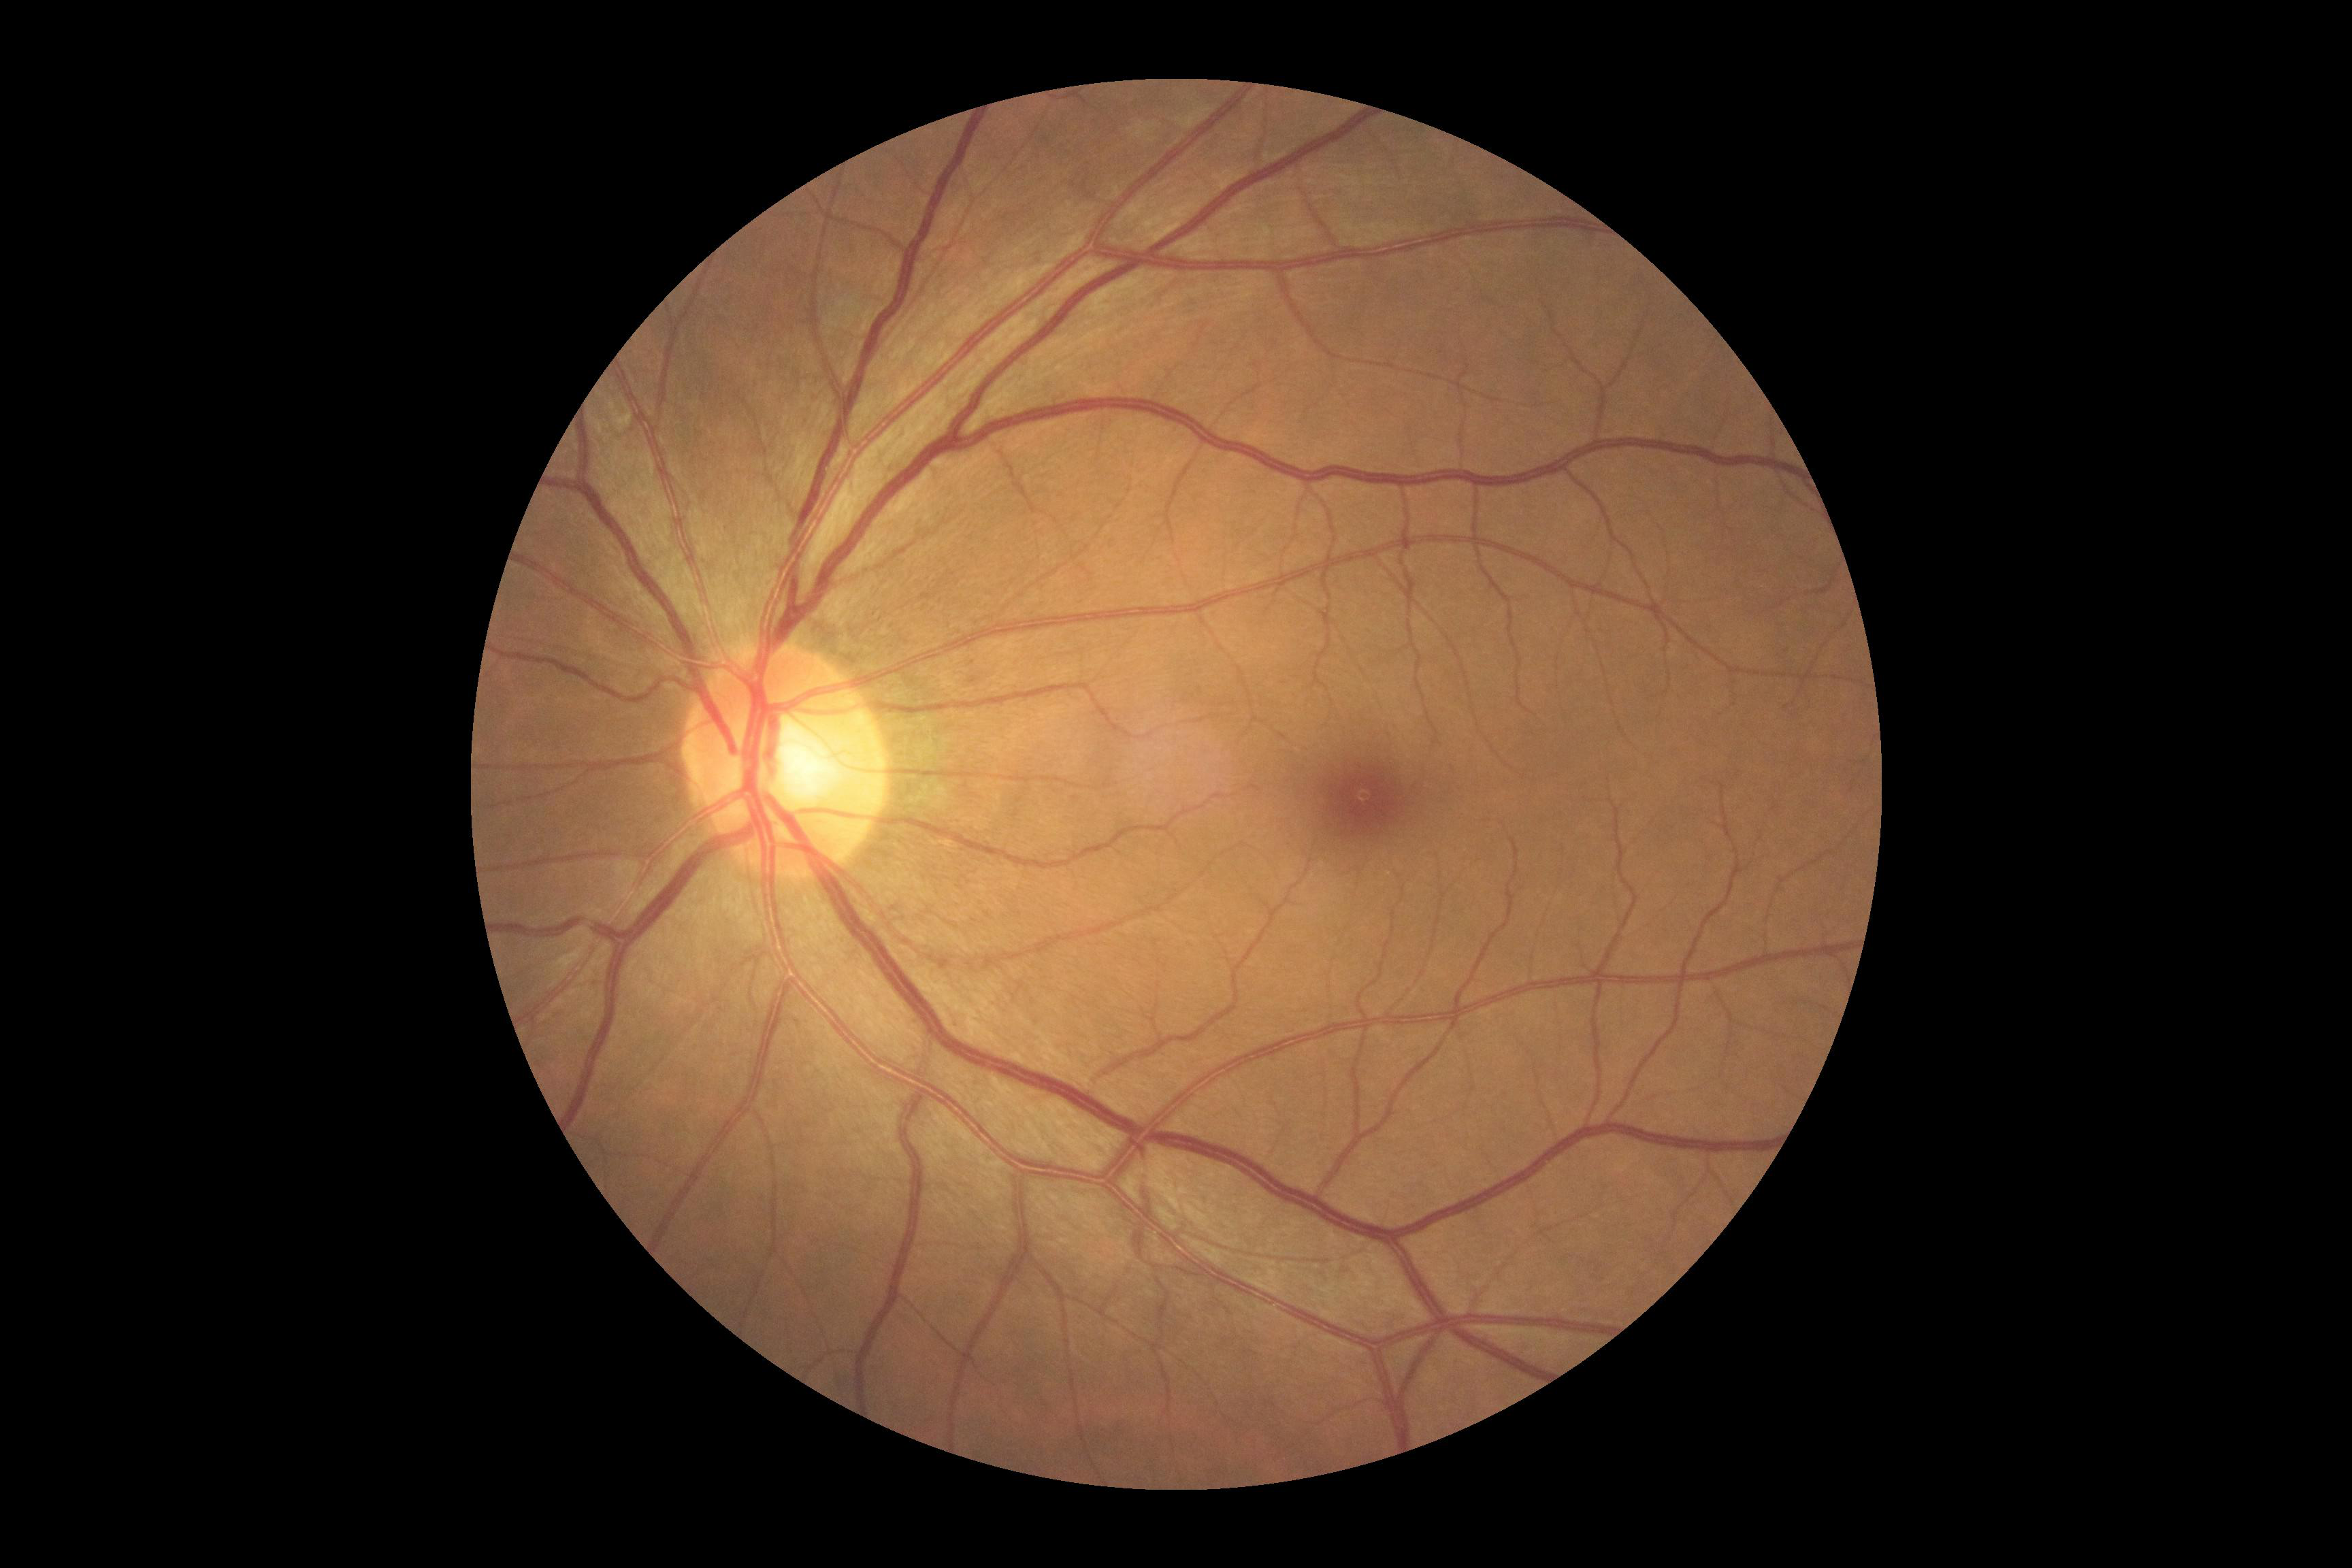

In [17]:
img = Image.open("Images/1_left.jpg")
img

In [25]:
def cropToFundus(x: torch.tensor):
    max_= x.max(dim=0)[0]
    valid_columns = torch.where(max_.max(dim=0)[0] > 30)[0]
    valid_rows = torch.where(max_.max(dim=1)[0] > 30)[0]
    x = x[:, valid_rows, :]
    x = x[:, :, valid_columns]
    return x
    


    

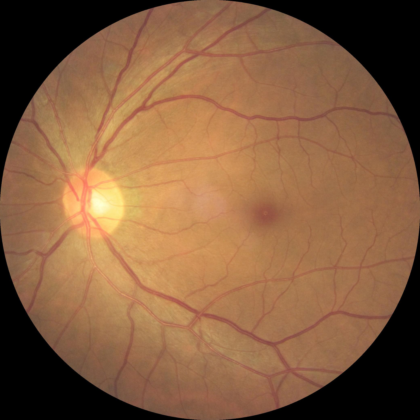

In [30]:
converted_img = transforms.PILToTensor()(img)
cropped_tensor = cropToFundus(converted_img)
cropped_image = ToPILImage()(cropped_tensor)
Resize((420,420))(cropped_image)

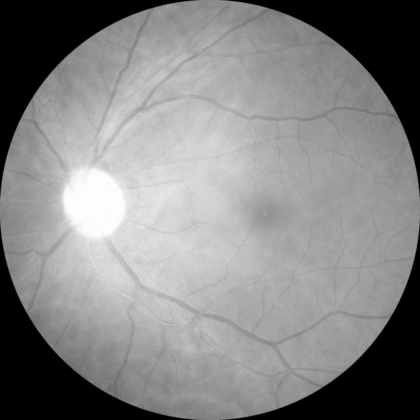

In [65]:
torch.Tensor.numpy(cropped_tensor)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [75]:
def convertToMeanRGBVector(x: torch.tensor):
    array=torch.Tensor.numpy(x)
    r_mean,g_mean,b_mean = np.mean(array[0]), np.mean(array[1]), np.mean(array[2])
    meanRGBvector=np.array([r_mean, g_mean, b_mean])
    return meanRGBvector 


In [76]:
convertToMeanRGBVector(cropped_tensor)

array([133.04205729,  94.16655951,  63.65810763])